In [27]:
import numpy as np 
import sys
sys.path.insert(0, "../")
sys.path.append("./neural_correlation")
from neural_correlation.ModelPerformance import ModelPerformance, KfoldPerformance
from data import patientNums
import os 
from neural_correlation.utilities import *
#stats_folder = "/media/yipeng/data/movie/Movie_Analysis/CNN_result/LSTM_multi_2_KLD"
stats_folder = "/media/yipeng/data/movie/Movie_Analysis/CNN_result/CNN_multi_2_KLD_final_pooling=1"
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
#retrain_stats_folder = "/media/yipeng/data/movie/Movie_Analysis/important_retrain/LSTM_retrain_1"
retrain_stats_folder = "/media/yipeng/data/movie/Movie_Analysis/important_retrain/CNN_important_retrain_1"
important_stats = []
non_important_stats = []
for this_patient in patientNums:
#for this_patient in ["441"]:
    #if this_patient is "439" or this_patient is "441":
    #    continue
    knockout_stats = load_pickle(os.path.join(stats_folder, this_patient , "knockout_final.pkl"))
    knockout_region = np.array(knockout_stats["region_label"])
    knockout_f1_means = np.mean(knockout_stats["region_f1"], axis=1)
    retrain_patient_folder = os.path.join(retrain_stats_folder, this_patient)
    retrain_regions = os.listdir(retrain_patient_folder)
    retrain_stats_list = []
    region_label = []
    for idx, erased_regions in enumerate(retrain_regions):
        one_retrain_folder = os.path.join(retrain_patient_folder, erased_regions)
        if not os.path.isdir(one_retrain_folder):
            continue
        region_label.append(erased_regions)
        region_stats = KfoldPerformance.generate_bypath(one_retrain_folder)
        one_retrain_stats = np.zeros((3,4))
        one_retrain_stats[0, :]= region_stats.get_character_f1_score()
        total_knockout_f1 = 0 
        for erased_region in erased_regions.split("_"):
            if erased_region.isdigit():
                one_retrain_stats[2,:] = int(erased_region)
            else:
                one_region_knockout = knockout_f1_means[np.where(knockout_region == str(erased_region.strip()))[0]]
                total_knockout_f1 += one_region_knockout
        print(erased_regions)
        print(total_knockout_f1,np.mean(knockout_f1_means))
        if total_knockout_f1*1.0/(len(erased_regions.split("_"))-1) >= np.mean(knockout_f1_means):
             one_retrain_stats[1,:] = 1 #nonimportant
        else:
            one_retrain_stats[1,:] = 2 #important
        retrain_stats_list.append(one_retrain_stats)
    one_retrain_stats = one_retrain_stats*0
    knockout_f1 = knockout_stats["region_f1"]
    one_retrain_stats[0,:] = knockout_f1[0,:]
    one_retrain_stats[2,:] = len(knockout_stats["region/neuron"])
    retrain_stats_list.append(one_retrain_stats)
    retrain_stats = np.array(retrain_stats_list)
    #
    # print(retrain_stats.shape)
    print(this_patient)
    print(retrain_stats)
    hori_label = [0,1,2,3]
    for idx in range(len(retrain_stats)):
        if int(retrain_stats[idx,1,0]) == 1:
            important_stats.append(retrain_stats[idx,0,:])
        if int(retrain_stats[idx,1,0]) == 2:
            non_important_stats.append(retrain_stats[idx,0,:])
    #print(retrain_stats[2,0,:])
    #print(retrain_stats[1,0,:])
    #break
'''   
x = [1, 2, 3, 4]
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 4))
for i in range(len(important_stats)):
    ax0.plot(x, non_important_stats[i], 'ro')
    ax1.plot(x, important_stats[i], 'bo')
ax0.set_ylim([0,1])
ax1.set_ylim([0,1])
ax0.set_title("non_important")
ax1.set_title("important")
plt.suptitle("LSTM")
plt.show()


def softmax_numpy(scores):
  return np.exp(scores)/sum(np.exp(scores))

x = [1, 2, 3, 4]
for i in range(len(important_stats)):
    print(important_stats[i])
    plt.scatter(x, important_stats[i], alpha=0.9, s=4)
plt.suptitle("CNN important - nonimportant")
plt.show()

plt.hist(np.concatenate(important_stats))
plt.show()
￼
'''

/media/yipeng/data/movie/Movie_Analysis/CNN_result/CNN_multi_2_KLD_final_pooling=1/431/knockout_final.pkl
LST_RA_RIPP_RMH_30
[3.63925286] 0.6608798395025466
LIP_RIPA_RSS_RSTA_RSTP_46
[1.99630621] 0.6608798395025466
431
[[[ 0.69864067  0.63431871  0.65305295  0.58985385]
  [ 1.          1.          1.          1.        ]
  [30.         30.         30.         30.        ]]

 [[ 0.63444943  0.56392037  0.58088299  0.51023435]
  [ 2.          2.          2.          2.        ]
  [46.         46.         46.         46.        ]]

 [[ 0.9721072   0.96408888  0.99356712  0.9631941 ]
  [ 0.          0.          0.          0.        ]
  [76.         76.         76.         76.        ]]]
/media/yipeng/data/movie/Movie_Analysis/CNN_result/CNN_multi_2_KLD_final_pooling=1/433/knockout_final.pkl
LPH_RAC_RACV_RMC_41
[1.88352902] 0.7784323968981788
LACV_LEC_LOF_LPSMA_REC_RPH_RPSMA_28
[6.47772837] 0.7784323968981788
433
[[[ 0.64213074  0.62556178  0.62645746  0.53281068]
  [ 2.          2.       

'   \nx = [1, 2, 3, 4]\nfig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 4))\nfor i in range(len(important_stats)):\n    ax0.plot(x, non_important_stats[i], \'ro\')\n    ax1.plot(x, important_stats[i], \'bo\')\nax0.set_ylim([0,1])\nax1.set_ylim([0,1])\nax0.set_title("non_important")\nax1.set_title("important")\nplt.suptitle("LSTM")\nplt.show()\n\n\ndef softmax_numpy(scores):\n  return np.exp(scores)/sum(np.exp(scores))\n\nx = [1, 2, 3, 4]\nfor i in range(len(important_stats)):\n    print(important_stats[i])\n    plt.scatter(x, important_stats[i], alpha=0.9, s=4)\nplt.suptitle("CNN important - nonimportant")\nplt.show()\n\nplt.hist(np.concatenate(important_stats))\nplt.show()\n￼\n'

In [28]:
a = np.concatenate(important_stats)
b = np.concatenate(non_important_stats)


In [29]:
import scipy.io
res = {"important":a,"unimportant":b}
scipy.io.savemat(os.path.join(retrain_stats_folder,'important_stats.mat'), mdict=res)

In [30]:
non_important_stats

[array([0.63444943, 0.56392037, 0.58088299, 0.51023435]),
 array([0.64213074, 0.62556178, 0.62645746, 0.53281068]),
 array([0.65891546, 0.60977858, 0.63640321, 0.5352335 ]),
 array([0.68880834, 0.64568667, 0.63693892, 0.54384614]),
 array([0.24024051, 0.14796329, 0.        , 0.08738983]),
 array([0.28024176, 0.28237712, 0.22818746, 0.1288235 ]),
 array([0.54104339, 0.39209557, 0.38755931, 0.26958497]),
 array([0.61841866, 0.55911942, 0.58294847, 0.47362127]),
 array([0.62017401, 0.62221525, 0.60209845, 0.55736705]),
 array([0.56060083, 0.50207294, 0.51877506, 0.33573558])]

In [31]:
from scipy.stats import ttest_ind, ttest_1samp

In [32]:
ttest,pval = ttest_1samp(a-b, 0)

In [33]:
ttest,pval = ttest_1samp(a-b, 0)
pval

6.483593689071537e-06

Text(0.5, 1.0, '6.483593689071537e-06')

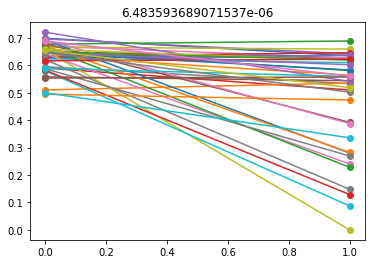

In [34]:
for i in range(len(a)):
    plt.plot([0,1],[a[i],b[i]],"o-")
    #plt.scatter(1,b[i])
plt.title(str(pval))

0.05363692170617503